Data set contains cases from study that was conducted between 1958 and 1970 at the university of chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

3 features and 1 class label is there.

1)Age: Age of the patient at the time of operation

2)Year: Year in which patient had an operation in 90's.If 64 is written it means 1964

3)Nodes: Number of positive axillary nodes detected. These are known as "Axillary lymph nodes" whose function is to filter fluids before they are eventually released into the blood stream. Having a cancer cell in nodes tells us that the cancer might have spread to other body parts also.

4) Survival Status: Target Variable, having two values 1 and 2.

1 indicates: The patient survived 5 years or longer post operation

2 indicates: The patient died with 5 years

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/haberman.csv")

In [4]:
#df.columns = ["age"...] Assigning the column name, no needed here because I already did in excel

In [5]:
df.head()

,Age,Year( Last two digit),Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Agenda: Given the patient with some age, year of opeation and number of lymph node detected, we have to predict or conclude the chances whether the patient will live less than 5 years or more than 5 years.

In [6]:
df.shape # The dataset size is very small, so for sure I cannot be certain with the results but anyways we will continue with the EDA

(306, 4)

In [7]:
df.isnull().sum()

,0
Age,0
Year( Last two digit),0
Nodes,0
Survival,0


In [8]:
df.duplicated().value_counts()

,count
False,289
True,17


In [9]:
# Now there are 17 duplicated values, let see the data once again and decide whether we should remove the duplicates or keep it.
# A person of same age can have same number of nodes, so it would not make any sense to remove the duplicates.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    306 non-null    int64
 1   Year( Last two digit)  306 non-null    int64
 2   Nodes                  306 non-null    int64
 3   Survival               306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [11]:
df.Survival.value_counts()

,count
Survival,
1,225
2,81


In [12]:
df = df.replace([1,2],[0,1])

In [13]:
df.Survival.value_counts()

,count
Survival,
0,225
1,81


In [14]:
df.describe()

,Age,Year( Last two digit),Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,3.826797,0.264706
std,10.803452,3.249405,7.275339,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


Minimum age is 30 and maximum age is 83.

Year is from 1958 to 1969.

Nodes range is from 0 to 52.

Also, Nodes have higher count density between 0 and 4 ( 75% percentile )


# ***Univariate Analysis***

In [15]:
# first feature is survival ( in percentages )
df.Survival.value_counts(1)

,proportion
Survival,
0,0.735294
1,0.264706


There are only 27% people who will be living less than 5 years, which means the dataset is imbalanced.

<Axes: xlabel='Survival', ylabel='count'>

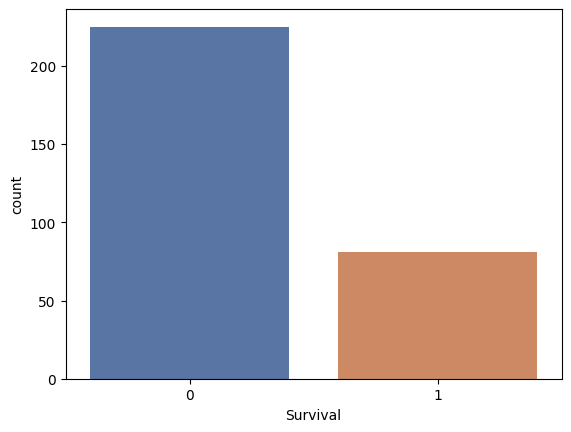

In [16]:
sns.countplot(x="Survival",data=df, palette="deep")

In [17]:
# Let's see for age
df.Age.describe()

,Age
count,306.000000
mean,52.457516
std,10.803452
min,30.000000
25%,44.000000
50%,52.000000
75%,60.750000
max,83.000000


0.14650505649010387


<Axes: xlabel='Age', ylabel='Count'>

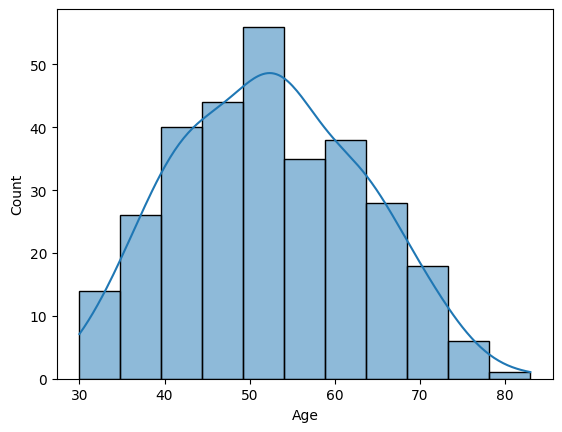

In [18]:
# let's see the skewness of the data
print(df.Age.skew())
sns.histplot(x="Age", data = df, binwidth=5 , kde=True )

The maximum people who were operated in the age group of 50 to 55.

Skewness measures the asymmetry of the data distribution:

Skewness ≈ 0: Data is symmetrical (like a bell curve).

Skewness > 0: Right-skewed (tail on the right; more younger ages).

Skewness < 0: Left-skewed (tail on the left; more older ages).

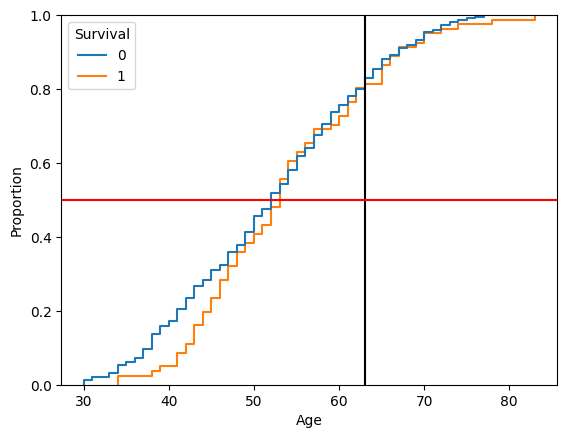

In [19]:
sns.ecdfplot(x="Age", data=df, hue="Survival")
plt.axvline(63, c="black")
plt.axhline(0.5, c="red")

From the visual we can say that nearly  80% of the people were 63 years or below

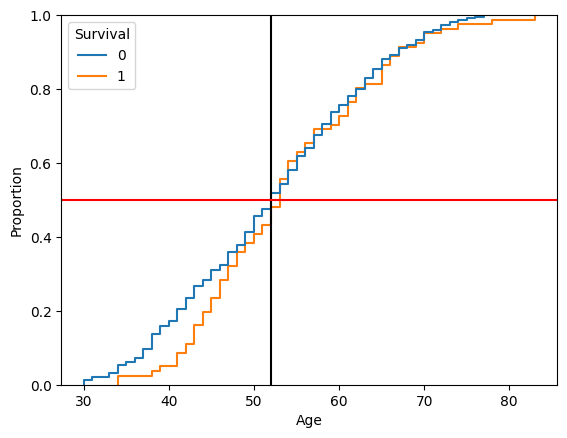

In [20]:
sns.ecdfplot(x="Age", data=df, hue="Survival")
plt.axvline(52, c="black")
plt.axhline(0.5, c="red")

From the visual we can say that nearly  50% of the people were 52 years or below

In [21]:
# Let's analyze the Operation year

In [22]:
df = df.rename(columns={"Year( Last two digit)": "Year"})

<Axes: xlabel='Year'>

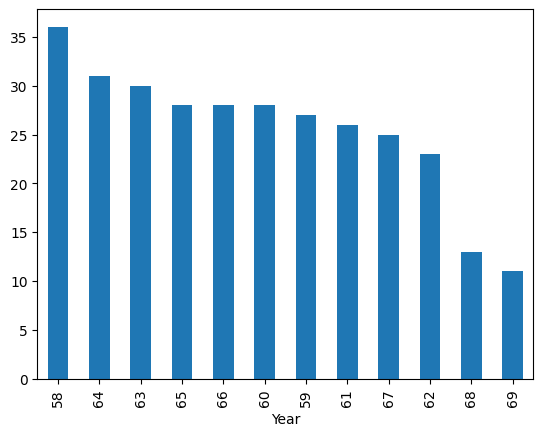

In [23]:
df.Year.value_counts().plot(kind= "bar")

In 1958, the maximum no of operations occured and minimum no of operations were in 1969. Question for the management team could be: why the no of operations reduced each year in real world sceanrio

In [24]:
# Let's analyze the lymph nodes

In [25]:
df.Nodes.describe()

,Nodes
count,306.000000
mean,3.826797
std,7.275339
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,52.000000


<Axes: xlabel='Nodes'>

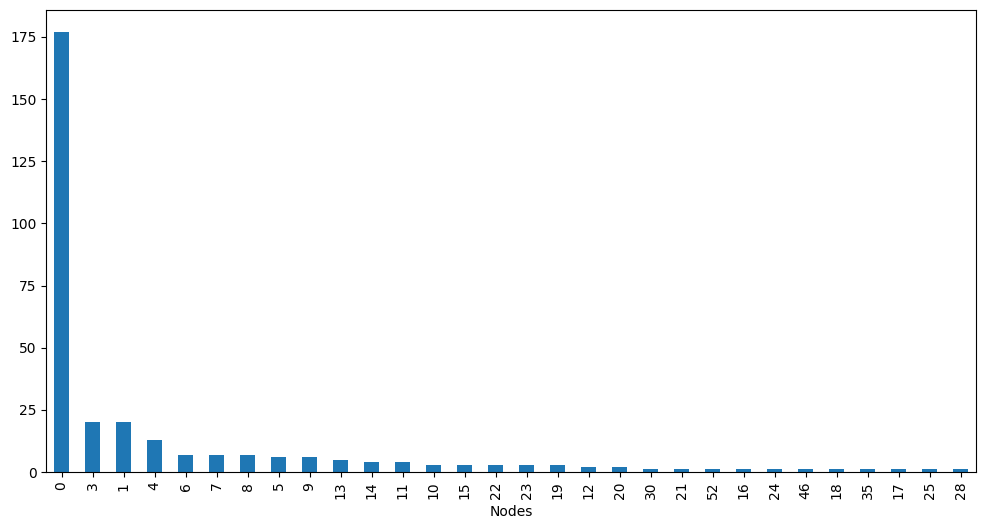

In [26]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind= "bar")

2.94587715103357


<Axes: xlabel='Nodes', ylabel='Count'>

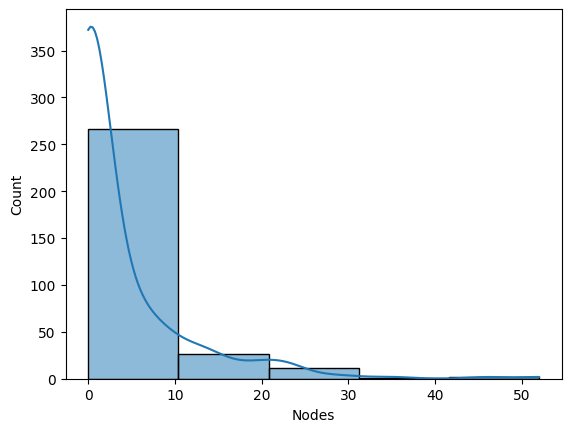

In [27]:
print(df.Nodes.skew())
sns.histplot(x="Nodes", data = df, binwidth=10 , kde=True )

It's a right skewed data because initially also we saw that 75% of the data points are from 0 to 4 for Nodes.

We can see from the distribution that Maximum Density count for nodes is between 0 and 10.

# ***Let's do the Bivariate Analysis***

In [28]:
# Age - Survival
# Age - Nodes - Survival
# Nodes - Survival
# Year - Survival
# Age - Nodes
# Year - Nodes
# Age - Years

<Axes: xlabel='Survival', ylabel='Age'>

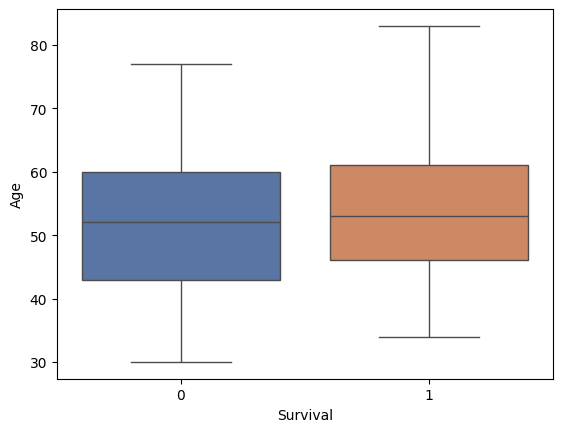

In [29]:
sns.boxplot(x="Survival",y="Age", data=df, palette="deep")

There are no outliers. Also, the people with age > 77 will actually live lesser than 5 years. Moreover, people with age < 35 will actually live more than 5 years based on the box plot.

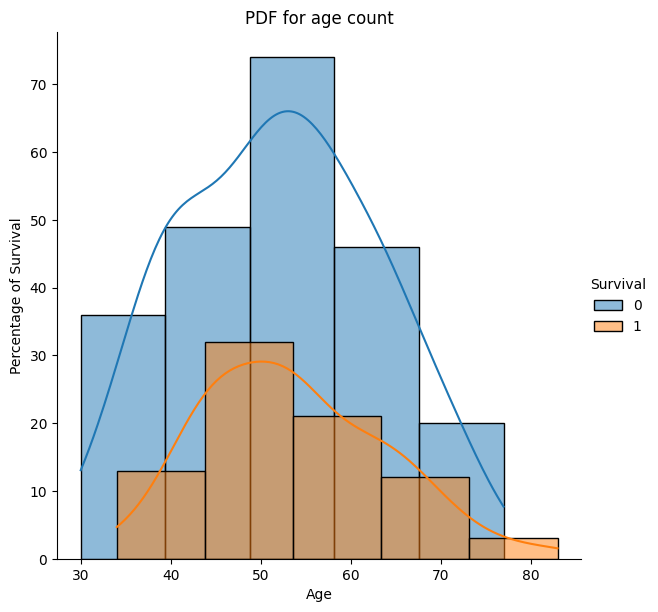

In [30]:
# Let's reconfirm the same thing
sns.FacetGrid(df, hue="Survival", height=6).map(sns.histplot,"Age", bins=5,kde=True).add_legend()
plt.xlabel("Age")
plt.ylabel("Percentage of Survival")
plt.title("PDF for age count",size=12)
plt.show()

Maximum % of people living lesser than 5 years are between 45 to 53

People between 30 to 33 years old are living more than 5 years

In [31]:
df.groupby("Age")["Survival"].sum().sort_values(ascending=False)

,Survival
Age,
53,6
43,4
54,4
52,4
46,4
65,4
47,3
41,3
44,3


In [32]:
df.Age.value_counts().sort_values(ascending=False)

,count
Age,
52,14
54,13
50,12
43,11
57,11
53,11
47,11
41,10
38,10


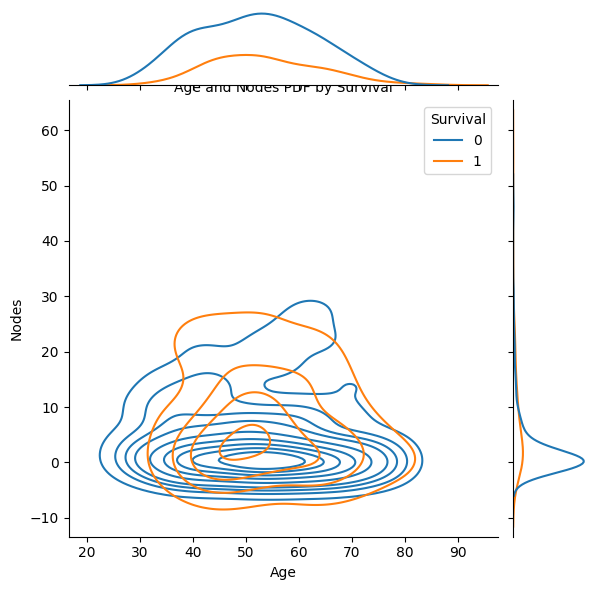

<Figure size 1200x600 with 0 Axes>

In [33]:
sns.jointplot(x="Age", y= "Nodes", data=df, hue="Survival", kind="kde")
plt.title("Age and Nodes PDF by Survival",size=10)
plt.figure(figsize=(12,6))
plt.show()

<Axes: xlabel='Survival', ylabel='Nodes'>

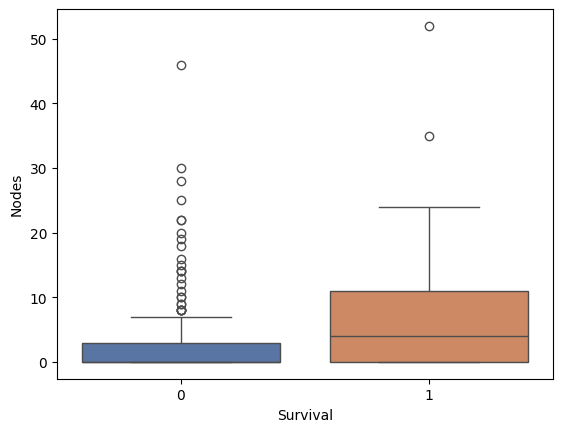

In [34]:
sns.boxplot(x="Survival",y="Nodes", data=df, palette="deep")

Age[43,53] and Nodes[10-52] will live lesser than 5 years. The same can be seen in box plot.

Here, I don't know whether I should remove this outliers or not. We need domain expert suggestion on that but just to see the behaviour of Node column, I am leaving the visual here.

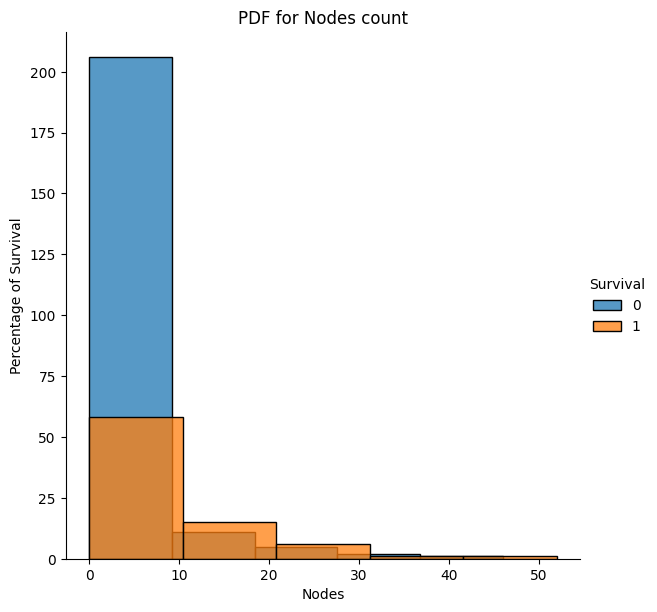

In [36]:
sns.FacetGrid(df, hue="Survival", height=6).map(sns.histplot,"Nodes", bins=5).add_legend()
plt.xlabel("Nodes")
plt.ylabel("Percentage of Survival")
plt.title("PDF for Nodes count",size=12)
plt.show()

People having Nodes more than 10, live less than 5 years

In [37]:
df.groupby("Nodes")["Survival"].sum().sort_values(ascending=False)

,Survival
Nodes,
0,27
3,7
1,5
5,4
13,4
9,4
6,3
4,3
11,3


In [38]:
df.Nodes.value_counts().sort_values(ascending=False)

,count
Nodes,
0,177
3,20
1,20
4,13
6,7
7,7
8,7
5,6
9,6


In [ ]:
'''Now, how to cross check and see

For 0 Node,No of people survived is 27 and total people are 177, so if we see the percentage of dying before 5 years then it would be 27/177 = 15%

Similarily,

1- 25%
3- 35%
4- 23%
5 -67%
10-33.33%
23- 100%

and so on. We can see like that. Also, if we will calculate and see people having more than 10 Nodes will have 100% probability of dying based on the dataset that we are exploring.
'''

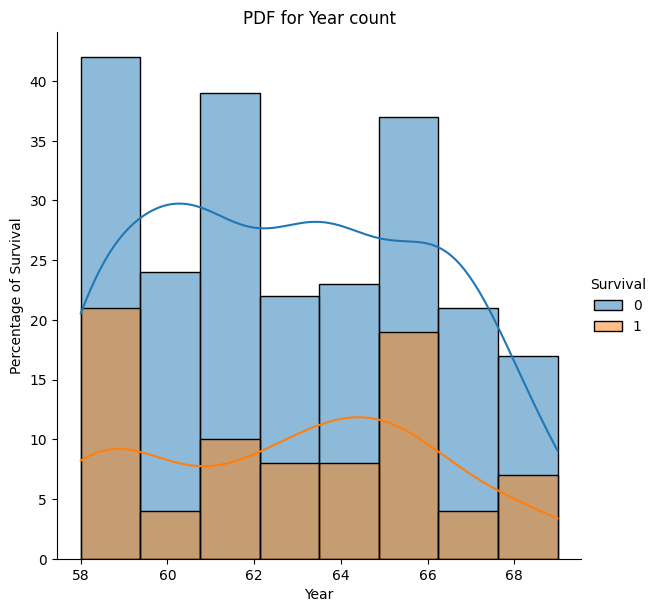

In [47]:
sns.FacetGrid(df, hue="Survival", height=6).map(sns.histplot,"Year", bins=8,kde=True).add_legend()
plt.xlabel("Year")
plt.ylabel("Percentage of Survival")
plt.title("PDF for Year count",size=12)
plt.show()

In [42]:
df.groupby("Survival")["Year"].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,23,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


In [44]:
13/28

0.4642857142857143

In [45]:
12/36

0.3333333333333333

In [46]:
6/28

0.21428571428571427

In [ ]:
'''
1965- 46% died
1958-33% died
and we can calculate the same way for other years
```

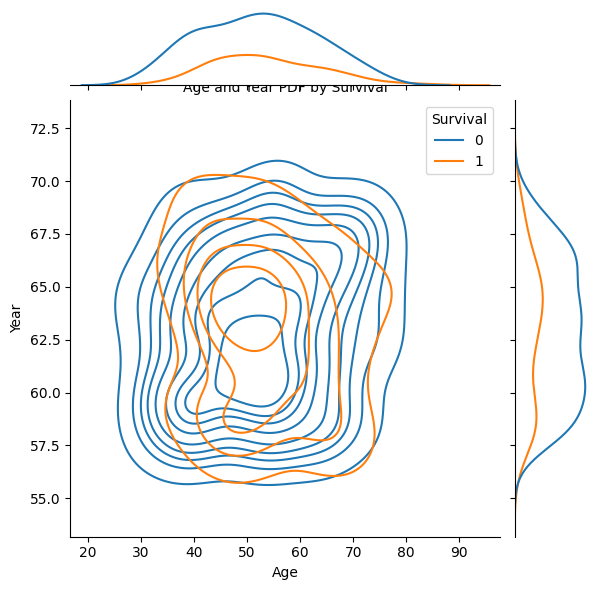

<Figure size 1200x600 with 0 Axes>

In [48]:
sns.jointplot(x="Age", y= "Year", data=df, hue="Survival", kind="kde")
plt.title("Age and Year PDF by Survival",size=10)
plt.figure(figsize=(12,6))
plt.show()

# ***Multivariate Analysis***

<Axes: >

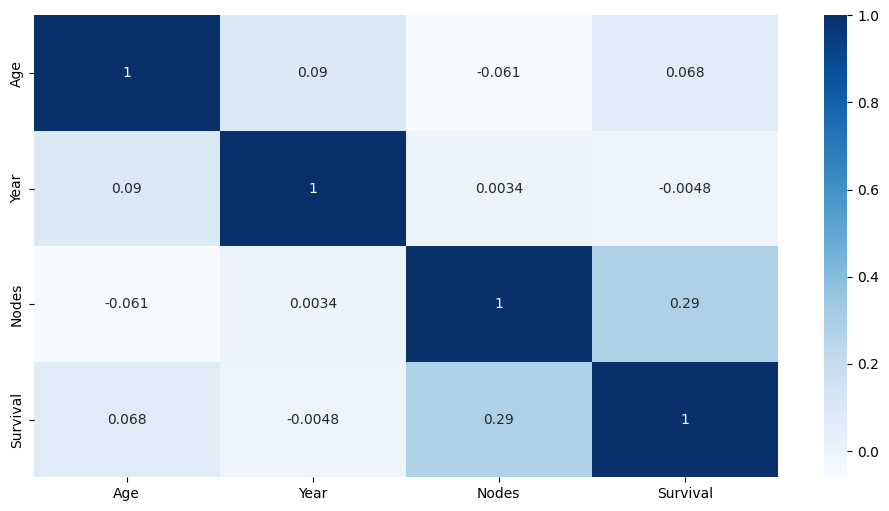

In [51]:
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="Blues",annot=True)

Nodes and Survival are corelated by 29%